# 1. トレーニングデータ読み込み
## 1. Load training dataset
- kitchen20 dataset (https://github.com/marc-moreaux/kitchen20)
  - "chopping"
  - "frying-pan"

In [1]:
import glob
import pickle
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython
from scipy import signal
from scipy.fft import fft
from scipy.fftpack import fftfreq
sr = 44100


def load(path, sampling_rate):
    wav_data = glob.glob(path)
    wav_data = sorted(wav_data) 
    #print(wav_data)

    sound_data_list = [i for i in range(len(wav_data))]
    for i in range(len(wav_data)):
        print("・", end="")
        sound_data_list[i], sr = librosa.load(wav_data[i], sr=sampling_rate) #import as mono to match the training data
    print("done!")
    return sound_data_list

In [2]:
path = "./audio/*.wav"
audio = load(path, sr)

・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・・

In [3]:
import pandas as pd
csv = pd.read_csv("kitchen20.csv", index_col=0)
sorted_csv = csv.sort_values(by="path").reset_index(drop=True)
sorted_csv.head()

,Unnamed: 0.1,category,fold,orig_idx,path,take,target,usr_id
0,675,microwave,1,675,audio/0-101477-A-3.wav,A,3,101477
1,676,microwave,1,676,audio/0-101477-B-3.wav,B,3,101477
2,677,microwave,1,677,audio/0-101477-C-3.wav,C,3,101477
3,290,cutlery,1,290,audio/0-101478-A-15.wav,A,15,101478
4,291,cutlery,1,291,audio/0-101478-B-15.wav,B,15,101478


In [4]:
len(audio)

1070

In [5]:
len(sorted_csv)

1070

In [6]:
label_all = sorted_csv["category"]
label_all

0       microwave
1       microwave
2       microwave
3         cutlery
4         cutlery
          ...    
1065      cutlery
1066      cutlery
1067      cutlery
1068      cutlery
1069      cutlery
Name: category, Length: 1070, dtype: object

In [7]:
# labeling
# ラベル付
def append(before, plus):
    after = np.append(before, plus)
    return after
labeled = list(map(append, audio, label_all))

In [8]:
labeled[:5]

[array(['0.03250122', '0.032073975', '0.03149414', ..., '-0.005493164',
        '-0.006164551', 'microwave'], dtype='<U32'),
 array(['0.020019531', '0.021026611', '0.023498535', ..., '0.028198242',
        '0.027618408', 'microwave'], dtype='<U32'),
 array(['-0.020080566', '-0.019165039', '-0.017547607', ...,
        '-0.028411865', '-0.028320312', 'microwave'], dtype='<U32'),
 array(['3.0517578e-05', '0.0011291504', '0.0021362305', ...,
        '-0.004760742', '-0.00491333', 'cutlery'], dtype='<U32'),
 array(['-0.0045166016', '-0.0045166016', '-0.004486084', ...,
        '-0.013641357', '-0.03741455', 'cutlery'], dtype='<U32')]

In [9]:
# use only "frying-pan" and "chopping" CHECK THIS WITH JOYA
# 炒めると切る音だけを使う

training_list = []
for i in range(len(labeled)):
    print(".", end="")
    if np.any((labeled[i] == "frying-pan") | (labeled[i] == "chopping") | (labeled[i] == "boiling-water")):
        training_list.append(labeled[i])
print("Done!!")

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [10]:
label_all.value_counts()

cutlery          69
frying-pan       68
dishwasher       66
plates           63
clean-dishes     60
sweep            59
drawer           56
stove-fan        54
book             52
microwave        51
juicer           51
water-flowing    50
fridge           50
peel             49
cupboard         47
blender          47
boiling-water    46
chopping         45
stove-burner     45
eat              42
Name: category, dtype: int64

In [11]:
print(len(training_list))
print(68 + 45)

159
113


In [12]:
# Listening

listening_num = 150
listening_data = training_list[listening_num][:-1]
listening_label = training_list[listening_num][-1]
print(listening_label)
IPython.display.Audio(data=listening_data,rate=sr)

frying-pan


## ピッケルで保存
## save training dataset by pickle

In [13]:
import pickle
def save_pickle(path, name):
    f = open(path, 'wb')
    pickle.dump(name, f)

In [14]:
#save_pickle('./pickle_file/training_list.txt', training_list)

## ピッケルで取得
## get training dataset by pickle

In [15]:
import pickle
def pickle_open(path):
    f = open(path,"rb")
    list_row = pickle.load(f)
    return list_row

In [16]:
#training_list = pickle_open('./pickle_file/training_list.txt')

In [17]:
IPython.display.Audio(data=training_list[88][:sr*5], rate=sr)

# 2. テストデータ読み込み
## 2. Load test dataset
- from youtube
- test1: only cooking sound
- test2: cooking sound and voice
- test3: cooking sound, voice, and bgm

In [18]:
path1 = "./data/nikujaga.wav"
test1 = load(path1, sr)
test1 = test1[0]

path2 = "./data/nikujaga_voice.wav"
test2 = load(path2, sr)
test2 = test2[0]

path3 = "./data/nikujaga_voice_BGM.wav"
test3 = load(path3, sr)
test3 = test3[0]

・done!
・done!
・done!


## labeling

In [19]:
def devide(ndarray, time, sampling_rate):
    devided_list = []
    
    for i in range(int((len(ndarray))//(time*sampling_rate))): 
        tmp = ndarray[time*sampling_rate*i : time*sampling_rate*(i+1)]
        devided_list.append(tmp)

    return devided_list

In [20]:
# ============test1====================
chopping1 = test1[sr*26: sr*55] # 28秒
frying1 = test1[sr*85: sr*118] # 32秒
simmering1 = test1[sr*118: sr*294] # 2分56秒

chopping1_list = devide(chopping1, 5, sr)
frying1_list = devide(frying1, 5, sr)
simmering1_list = devide(simmering1, 5, sr)

# ============test2====================
chopping2_v1 = test2[sr*125: sr*139] # 13秒
chopping2_v2 = test2[sr*146: sr*159] # 12秒
chopping2_v3 = test2[sr*182: sr*191] # 8秒
chopping2_v4 = test2[sr*206: sr*212] # 5秒
chopping2_v5 = test2[sr*304: sr*311] # 6秒
chopping2_v6 = test2[sr*315: sr*321] # 5秒
frying2 = test2[sr*415: sr*491] # 76秒
simmering2 = test2[sr*501: sr*814] # 312秒


chopping2_list1 = devide(chopping2_v1, 5, sr)
chopping2_list2 = devide(chopping2_v2, 5, sr)
chopping2_list3 = devide(chopping2_v3, 5, sr)
chopping2_list4 = devide(chopping2_v4, 5, sr)
chopping2_list5 = devide(chopping2_v5, 5, sr)
chopping2_list6 = devide(chopping2_v6, 5, sr)
frying2_list = devide(frying2, 5, sr)
simmering2_list = devide(simmering2, 5, sr)

chopping2_list = np.concatenate([chopping2_list1, chopping2_list2, chopping2_list3, 
                           chopping2_list4, chopping2_list5, chopping2_list6], 0)
frying2_list = frying2_list
simmering2_list = simmering2_list

# ============test3===============
chopping3_v1 = test3[sr*7: sr*18] # 10秒
chopping3_v2 = test3[sr*21: sr*29] # 7秒
chopping3_v3 = test3[sr*29: sr*33] # 3秒
frying3 = test3[sr*43: sr*61] # 17秒
simmering3_v1 = test3[sr*62: sr*79] # 16秒
simmering3_v2 = test3[sr*79: sr*107] # 27秒
simmering3_v3 = test3[sr*123: sr*137] # 13秒

chopping3_list1 = devide(chopping3_v1, 5, sr)
chopping3_list2 = devide(chopping3_v2, 5, sr)
chopping3_list3 = devide(chopping3_v3, 5, sr)
frying3_list = devide(frying3, 5, sr)
simmering3_list1 = devide(simmering3_v1, 5, sr)
simmering3_list2 = devide(simmering3_v2, 5, sr)
simmering3_list3 = devide(simmering3_v3, 5, sr)

chopping3_list = np.concatenate([chopping3_list1, chopping3_list2#,chopping3_list3 #5秒ないのでカット
                              ], 0)
frying3_list = frying3_list
simmering3_list = np.concatenate([simmering3_list1, simmering3_list2,simmering3_list3], 0)

In [21]:
IPython.display.Audio(data=chopping1_list[0], rate=sr)

In [22]:
def labeling(dataset_list, labeling_name):
    labeled_list = []
    for i in range(len(dataset_list)):
        tmp = np.append(dataset_list[i], labeling_name)
        labeled_list.append(tmp)
        print(".", end="")
    print("Done!!")
    return labeled_list

In [23]:
# test1
labeled_chopping1 = labeling(chopping1_list, "chopping")
labeled_frying1 = labeling(frying1_list, "frying-pan")
labeled_simmering1 = labeling(simmering1_list, "simmering")

# test2
labeled_chopping2 = labeling(chopping2_list, "chopping")
labeled_frying2 = labeling(frying2_list, "frying-pan")
labeled_simmering2 = labeling(simmering2_list, "simmering")

# test3
labeled_chopping3 = labeling(chopping3_list, "chopping")
labeled_frying3 = labeling(frying3_list, "frying-pan")
labeled_simmering3 = labeling(simmering3_list, "simmering")

.....Done!!
......Done!!
...................................Done!!
........Done!!
...............Done!!
..............................................................Done!!
...Done!!
...Done!!
..........Done!!


In [24]:
test1_list = labeled_chopping1 + labeled_frying1 + labeled_simmering1
test2_list = labeled_chopping2 + labeled_frying2 + labeled_simmering2
test3_list = labeled_chopping3 + labeled_frying3 + labeled_simmering3

## ピッケルで保存
## save test dataset by pickle

In [25]:
#save_pickle('./pickle_file/test1_list.txt', test1_list)
#save_pickle('./pickle_file/test2_list.txt', test2_list)
#save_pickle('./pickle_file/test3_list.txt', test3_list)

## ピッケルで取得
## get teat dataset by pickle

In [26]:
#test1_list = pickle_open('./pickle_file/test1_list.txt')
#test2_list = pickle_open('./pickle_file/test2_list.txt')
#test3_list = pickle_open('./pickle_file/test3_list.txt')

In [27]:
def separation(labeled_list):
    label_list = []
    dataset_list = []
    for i in range(len(labeled_list)):
        tmp_label = labeled_list[i][-1]
        tmp_dataset = labeled_list[i][:-1]
        tmp_dataset = tmp_dataset.astype(float)
        print(".", end="")
        label_list.append(tmp_label)
        dataset_list.append(tmp_dataset)
    print("Done!!")
    return dataset_list, label_list

In [28]:
training_dataset, training_label = separation(training_list)
test1_dataset, test1_label = separation(test1_list)
test2_dataset, test2_label = separation(test2_list)
test3_dataset, test3_label = separation(test3_list)

...............................................................................................................................................................Done!!
..............................................Done!!
.....................................................................................Done!!
................Done!!


In [29]:
len(test1_dataset)

46

In [30]:
print(test1_label)

['chopping', 'chopping', 'chopping', 'chopping', 'chopping', 'frying-pan', 'frying-pan', 'frying-pan', 'frying-pan', 'frying-pan', 'frying-pan', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering', 'simmering']


## Listening

In [31]:
# Training

listening_num = 0
listening_data = training_dataset[listening_num]
listening_label = training_label[listening_num]
print(len(training_dataset))
print("label:",listening_label)
IPython.display.Audio(data=listening_data,rate=sr)

159
label: frying-pan


In [32]:
# Test

listening_num = 24
listening_data = test1_dataset[listening_num]
listening_label = test1_label[listening_num]
print(len(test1_dataset))
print("label:", listening_label)
IPython.display.Audio(data=listening_data,rate=sr)

46
label: simmering


In [33]:
listening_data.shape

(220500,)

# 3. トレーニングデータのデータ拡張
## 3. Data augmentation

In [34]:
# ホワイトノイズ加える
# white_noise
def add_white_noise(x_list, rate=0.002):
    noise_list = []
    for i in range(len(x_list)):
        x = x_list[i]
        noise_list.append(x + rate*np.random.randn(len(x)))
    return noise_list

# タイムシフト
# time shift
def shift_sound(x_list, rate=2):
    shift_list = []
    for i in range(len(x_list)):
        x = x_list[i]
        shift_list.append(np.roll(x, int(len(x)//rate)))
    return shift_list

In [35]:
training_white = add_white_noise(training_dataset)
training_shift = shift_sound(training_dataset)

In [36]:
training_dataset_with_noise = training_dataset + training_white + training_shift

In [37]:
len(training_dataset_with_noise)

477

# 3.5. フィルタリング + ブースチング
## 3.5. Filtering + Boosting 城谷くん, this might be better after normalization? What do you think?

In [38]:
#Simple Butterworth HPF (implemented with lfilter, but could also use filtfilt for zero phase shift)
def hp_filt(s_list, cut_off_freq): #Probably smarter to use an array here, but this works
    hp_filt_list = []
    hpf = signal.butter(2, cut_off_freq, btype='highpass', fs=sr) 
    if type(s_list) is list:
        for sig in s_list:
            f_sig = signal.lfilter(hpf[0], hpf[1], sig)
            hp_filt_list.append(f_sig) 
        return hp_filt_list
    else: 
        sig=s_list
        f_sig = signal.lfilter(hpf[0], hpf[1], sig)
        hp_filt_list.append(f_sig)
        #test this
    return f_sig

In [39]:
#Simple Butterworth LPF (implemented with lfilter, but could also use filtfilt for zero phase shift)
def lp_filt(s_list, cut_off_freq): #Probably smarter to use an array here, but this works
    lp_filt_list = []
    lpf = signal.butter(2, cut_off_freq, btype='lowpass', fs=sr) 
    if type(s_list) is list:
        for sig in s_list:
            f_sig = signal.lfilter(lpf[0], lpf[1], sig)
            lp_filt_list.append(f_sig) 
        return lp_filt_list
    else: 
        sig=s_list
        f_sig = signal.lfilter(lpf[0], lpf[1], sig)
        lp_filt_list.append(f_sig)
        #test this
    return f_sig

In [40]:
#IIR notch filter  (implemented with lfilter, but could also use filtfilt for zero phase shift)
def filt_iir_notch(s_list, cut_off_freq): #Probably smarter to use an array here, but this works
    iir_filt_list = []
    iir = signal.iirnotch(cut_off_freq, 30, fs=sr) 
    if type(s_list) is list:
        for sig in s_list:
            f_sig = signal.lfilter(iir[0], iir[1], sig)
            iir_filt_list.append(f_sig) 
        return iir_filt_list
    else: 
        sig=s_list
        f_sig = signal.lfilter(iir[0], iir[1], sig)
        iir_filt_list.append(f_sig)
        #test this
    return f_sig

In [41]:
#Collect all data into a list
full_data_list = training_list + test1_list + test2_list + test3_list

In [42]:
#Split into categories
fp_list = []
cp_list = []
sm_list = []
for entry in full_data_list:
    if (entry[-1] == 'frying-pan' and len(entry[:-1])) == 220500:
        fp_list.append(entry[:-1])
    if entry[-1] == 'chopping'and len(entry[:-1]) == 220500:  #some of these are a strange size
        cp_list.append(entry[:-1])
    if entry[-1] == 'simmering'and len(entry[:-1]) == 220500:
        sm_list.append(entry[:-1])
        
fp_array = np.array(fp_list, dtype = float)
cp_array = np.array(cp_list, dtype = float)
sm_array = np.array(sm_list, dtype = float)

In [43]:
#Get a single average signal to represent the category
fp_mean_sig = fp_array.mean(axis = 0)
cp_mean_sig = cp_array.mean(axis = 0)
sm_mean_sig = sm_array.mean(axis = 0)

mean_sig_list = [fp_mean_sig, cp_mean_sig, sm_mean_sig]

In [44]:
# Filter parameters
sig_l = 5 #signal length is 5s, 合ってる？
cut_off_freq = sr/4
N = sr * sig_l

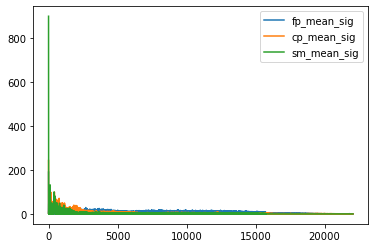

In [45]:
#Plot average signals before filtering
f_bins = fftfreq(N, 1 / sr)
f_bins_pos = f_bins[:len(f_bins)//2] #-1 somewhere?
plot_names = ['fp_mean_sig', 'cp_mean_sig', 'sm_mean_sig']
name_var = 0
fig, ax = plt.subplots()

for mean_sig in mean_sig_list:    
    MEAN_SIG = fft(mean_sig)
    MEAN_SIG_ABS = np.abs(MEAN_SIG)
    MEAN_SIG_POS = 2*(MEAN_SIG_ABS[:len(MEAN_SIG_ABS)//2]) # *2 for amplitude makeup
    ax.plot(f_bins_pos, MEAN_SIG_POS, label=plot_names[name_var])
    name_var = name_var + 1
    
ax.legend()
plt.show()

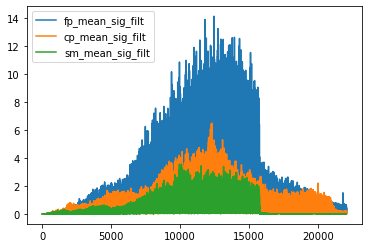

In [46]:
#Plot average signals after filtering
hpf_mean_sig_list = hp_filt(mean_sig_list, cut_off_freq) #,axis=0 use this do to the whole array?)
lpf_mean_sig_list = lp_filt(mean_sig_list, cut_off_freq) #,axis=0 use this do to the whole array?)
iir_mean_sig_list = filt_iir_notch(mean_sig_list, cut_off_freq) #,axis=0 use this do to the whole array?)

plot_names = ['fp_mean_sig_filt', 'cp_mean_sig_filt', 'sm_mean_sig_filt']
name_var = 0
fig, ax = plt.subplots()

for filt_mean_sig in hpf_mean_sig_list:    
    FILT_MEAN_SIG = fft(filt_mean_sig)
    FILT_MEAN_SIG_ABS = np.abs(FILT_MEAN_SIG)
    FILT_MEAN_SIG_POS = 2*(FILT_MEAN_SIG_ABS[:len(FILT_MEAN_SIG_ABS)//2]) # *2 for amplitude makeup
    ax.plot(f_bins_pos, FILT_MEAN_SIG_POS, label=plot_names[name_var])
    name_var = name_var + 1
    
ax.legend()
plt.show()

In [47]:
filtered_training_dataset_with_noise = lp_filt(training_dataset_with_noise, cut_off_freq)
filtered_test1_dataset = hp_filt(test1_dataset, cut_off_freq)
filtered_test2_dataset = hp_filt(test2_dataset, cut_off_freq)
filtered_test3_dataset = hp_filt(test3_dataset, cut_off_freq)

# 4. 特徴量抽出
## 4. Extract features

## 正規化
## normalization

In [48]:
def normalization(data_list):
    for i in range(len(data_list)):
        data_list[i] = librosa.util.normalize(data_list[i])
    return data_list

In [49]:
normed_training_dataset = normalization(filtered_training_dataset_with_noise)
normed_test1_dataset = normalization(filtered_test1_dataset)
normed_test2_dataset = normalization(filtered_test2_dataset)
normed_test3_dataset = normalization(filtered_test3_dataset)

## 特徴量取得
## extract features

In [50]:
import numpy as np

def make_feature(a_list,sr, MFCC=True, RMS=True, ZCR=True):
    all_features = [] 
    feature_list = []
  
    for i in range(len(a_list)): 
        y = a_list[i]
            
        if MFCC:
            mfcc = librosa.feature.mfcc(y=y, sr=sr)
            for e in mfcc:
                 feature_list += [np.mean(e),np.amax(e),np.amin(e), np.var(e)]
        if RMS:
            rms = librosa.feature.rms(y=y)
            feature_list += [np.mean(rms),np.amax(rms),np.amin(rms),np.var(rms)]
        if ZCR:
            ZCR = librosa.feature.zero_crossing_rate(y=y)
            feature_list += [np.mean(zcr),np.amax(zcr),np.amin(zcr),np.var(zcr)]

        all_features.append(feature_list)
        print(".",end="")
        feature_list = [] #初期化
    print("end!")
    return all_features

In [51]:
features_training = make_feature(normed_training_dataset, sr, MFCC=True, RMS=False, ZCR=False)
features_test1 = make_feature(normed_test1_dataset, sr, MFCC=True, RMS=False, ZCR=False)
features_test2 = make_feature(normed_test2_dataset, sr, MFCC=True, RMS=False, ZCR=False)
features_test3 = make_feature(normed_test3_dataset, sr, MFCC=True, RMS=False, ZCR=False)

.............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................end!
..............................................end!
.....................................................................................end!
................end!


## データフレームに変換
## make DataFrame

In [52]:
# columns
sound_features = [#'ZCR', 
                  #'RMS',
                  'MFCC']
basic_features = ['mean', 'max', 'min', 'var']

columns = ''
for name in sound_features:
    if name != 'MFCC':
        for kind in basic_features:
            columns += f" {name}_{kind}" #スペース区切りなのでスペースが大事
    else:
        for mfcc_number in range(1,21):
            for kind in basic_features:
                columns += f" {name}{mfcc_number}_{kind}"
            
#columns += ' label'     
columns = columns.split() #区切り文字で分割する
print(columns)

['MFCC1_mean', 'MFCC1_max', 'MFCC1_min', 'MFCC1_var', 'MFCC2_mean', 'MFCC2_max', 'MFCC2_min', 'MFCC2_var', 'MFCC3_mean', 'MFCC3_max', 'MFCC3_min', 'MFCC3_var', 'MFCC4_mean', 'MFCC4_max', 'MFCC4_min', 'MFCC4_var', 'MFCC5_mean', 'MFCC5_max', 'MFCC5_min', 'MFCC5_var', 'MFCC6_mean', 'MFCC6_max', 'MFCC6_min', 'MFCC6_var', 'MFCC7_mean', 'MFCC7_max', 'MFCC7_min', 'MFCC7_var', 'MFCC8_mean', 'MFCC8_max', 'MFCC8_min', 'MFCC8_var', 'MFCC9_mean', 'MFCC9_max', 'MFCC9_min', 'MFCC9_var', 'MFCC10_mean', 'MFCC10_max', 'MFCC10_min', 'MFCC10_var', 'MFCC11_mean', 'MFCC11_max', 'MFCC11_min', 'MFCC11_var', 'MFCC12_mean', 'MFCC12_max', 'MFCC12_min', 'MFCC12_var', 'MFCC13_mean', 'MFCC13_max', 'MFCC13_min', 'MFCC13_var', 'MFCC14_mean', 'MFCC14_max', 'MFCC14_min', 'MFCC14_var', 'MFCC15_mean', 'MFCC15_max', 'MFCC15_min', 'MFCC15_var', 'MFCC16_mean', 'MFCC16_max', 'MFCC16_min', 'MFCC16_var', 'MFCC17_mean', 'MFCC17_max', 'MFCC17_min', 'MFCC17_var', 'MFCC18_mean', 'MFCC18_max', 'MFCC18_min', 'MFCC18_var', 'MFCC19_m

In [53]:
def make_DataFrame(features, columns, label):
    df = pd.DataFrame(features)
    df.columns = columns
    df["label"] = label
    df['label'] = df['label'].map({'chopping':0, 'frying-pan':1, 'simmering':2})
    
    return df

In [54]:
df_training = make_DataFrame(features_training, columns, training_label*3)
df_training = df_training.fillna(2)
df_test1 = make_DataFrame(features_test1, columns, test1_label)
df_test2 = make_DataFrame(features_test2, columns, test2_label)
df_test3 = make_DataFrame(features_test3, columns, test3_label)

In [55]:
df_training.head()

,MFCC1_mean,MFCC1_max,MFCC1_min,MFCC1_var,MFCC2_mean,MFCC2_max,MFCC2_min,MFCC2_var,MFCC3_mean,MFCC3_max,...,MFCC18_var,MFCC19_mean,MFCC19_max,MFCC19_min,MFCC19_var,MFCC20_mean,MFCC20_max,MFCC20_min,MFCC20_var,label
0,-100.332150,-54.599700,-136.555952,138.497142,88.264931,128.715409,62.431553,76.223763,-73.191964,-51.347924,...,18.246484,3.684272,16.707083,-6.884090,17.501493,1.814263,14.027101,-11.058879,14.731889,1.0
1,-78.185314,-45.706029,-111.669479,183.314629,77.578633,108.394561,52.220428,65.051104,-81.323702,-57.381994,...,17.723777,-0.542499,10.444758,-13.286040,14.563765,5.101696,14.854774,-7.328356,13.049889,1.0
2,-90.195428,-32.458022,-120.144185,143.229818,85.339680,111.834887,40.004383,85.233129,-77.335071,-56.520216,...,17.426768,3.298288,13.280749,-8.580420,15.186886,2.931181,13.192067,-10.515635,14.205606,1.0
3,-90.983431,-49.767798,-125.576646,113.188441,92.115383,115.459209,71.629363,60.992638,-75.788793,-50.465663,...,16.424045,0.993872,11.843196,-11.711728,14.786079,6.017454,16.518884,-6.472840,14.661492,1.0
4,-90.588004,-51.795236,-117.378307,150.857898,205.257198,218.888320,174.975453,28.404452,-75.670525,-51.756139,...,11.717099,-0.162746,9.804361,-13.040999,11.764315,-0.656652,11.384305,-14.838437,14.857400,2.0


# 5. 機械学習
## 5. Machine learning
- df_test1: only cooking sound
- df_test2: cooking sound + voice
- df_test3: cooking sound + voice + BGM

In [56]:
# training data
X_train = np.array(df_training.iloc[:, :-1], dtype = float)
y_train = df_training["label"]

# test data
# change data 
# df_test1 or df_test2 or df_test3
X_test = np.array(df_test3.iloc[:, :-1], dtype = float)
y_test = df_test3["label"]

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=15, random_state=0, n_estimators=15)
clf = clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
# トレーニングデータに対する精度
pred_train = clf.predict(X_train)

accuracy_train = accuracy_score(y_train, pred_train)

print('トレーニングデータに対する正解率： %.2f' % accuracy_train)
    
# テストデータに対する精度
pred_test = clf.predict(X_test)

accuracy_test = accuracy_score(y_test, pred_test)


print('テストデータに対する正解率： %.3f' % accuracy_test)

トレーニングデータに対する正解率： 1.00
テストデータに対する正解率： 0.375


In [58]:
def cm1(X_test, y_test, model):
    names = ["chopping","frying-pan", "simmering"]
    labels = [0, 1, 2]
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    y_pred = model.predict(X_test)

#最初
    ax1 = plt.subplot()
    cm1 = confusion_matrix(y_test, y_pred, labels=labels)
    sns.heatmap(cm1, annot = True, cmap='Blues', fmt =".0f",ax=ax1,cbar=True,square=True,
               xticklabels=names,
               yticklabels=names)
    plt.xlabel("Predicted")
    plt.ylabel("True")


    from sklearn.metrics import classification_report
    
    print(classification_report(y_test, y_pred, target_names=names))
    #plt.savefig('seaborn_heatmap_living_1.pdf',bbox_inches='tight')

def cm2(X_test, y_test, model):
    names = ["chopping","frying-pan", "simmering"]
    labels = [0, 1, 2]
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    y_pred = model.predict(X_test)


#いじる
    ax2 = plt.subplot()
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    normed_c = (cm.T *100/ cm.astype(np.float).sum(axis=1)).T
    sns.heatmap(normed_c, annot = True, cmap='Blues', fmt =".1f",ax=ax2,cbar=False,square=True,
               xticklabels=names,
               yticklabels=names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    #plt.savefig('seaborn_heatmap_bedroom_2.pdf',bbox_inches='tight')

              precision    recall  f1-score   support

    chopping       0.38      1.00      0.55         3
  frying-pan       0.38      1.00      0.55         3
   simmering       0.00      0.00      0.00        10

    accuracy                           0.38        16
   macro avg       0.25      0.67      0.36        16
weighted avg       0.14      0.38      0.20        16



/Users/billydawton/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/billydawton/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/billydawton/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


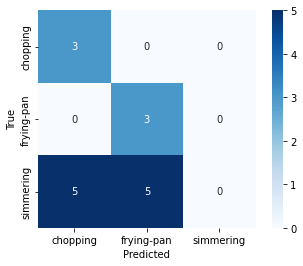

In [59]:
cm1(X_test, y_test, clf)